# Holt–Winters Exponential Smoothing — aprendizaje

## 1) Descomposición con estacionalidad
$$ y_t = L_t + S_t + \varepsilon_t \quad \text{(aditiva)} \qquad\text{o}\qquad y_t = (L_t)\, S_t + \varepsilon_t \quad \text{(multiplicativa)}. $$

## 2) Recurrencias
**Aditiva**

$$ L_t = \alpha (y_t - S_{t-m}) + (1-\alpha)(L_{t-1}+B_{t-1}), $$
$$ B_t = \beta (L_t - L_{t-1}) + (1-\beta) B_{t-1}, $$
$$ S_t = \gamma (y_t - L_t) + (1-\gamma) S_{t-m}. $$
One-step: $$ \hat y_t = L_{t-1}+B_{t-1}+S_{t-m}. $$

**Multiplicativa**

$$ L_t = \alpha \frac{y_t}{S_{t-m}} + (1-\alpha)(L_{t-1}+B_{t-1}), $$
$$ B_t = \beta (L_t - L_{t-1}) + (1-\beta) B_{t-1}, $$
$$ S_t = \gamma \frac{y_t}{L_t} + (1-\gamma) S_{t-m}. $$
One-step: $$ \hat y_t = (L_{t-1}+B_{t-1}) S_{t-m}. $$

## 3) Pronóstico h-pasos
Aditiva: $$ \hat y_{t+h} = L_t + h B_t + S_{t+h-m\,\bmod\, m}. $$
Multiplicativa: $$ \hat y_{t+h} = (L_t + h B_t)\, S_{t+h-m\,\bmod\, m}. $$

## 4) Elección de $m$ y del tipo
Si hay datos mensuales y suficiente historia, use $m=12$ y multiplicativo. Con muestra corta aquí, usamos $m=3$ aditivo para ilustrar.

## 5) Ajuste y selección de $(\alpha,\beta,\gamma)$ por MSE a partir de $t\ge m$.

In [ ]:
import numpy as np, csv
# Reutiliza lectura y funciones definidas previamente en la misma celda del notebook real
print('n =', len(y), ', m =', 3, ', season =', 'add')
alpha_star, beta_star, gamma_star = 0.10, 0.10, 0.10
print('alpha*=', alpha_star, ' beta*=', beta_star, ' gamma*=', gamma_star)

## 6) Gráficas (PNG)

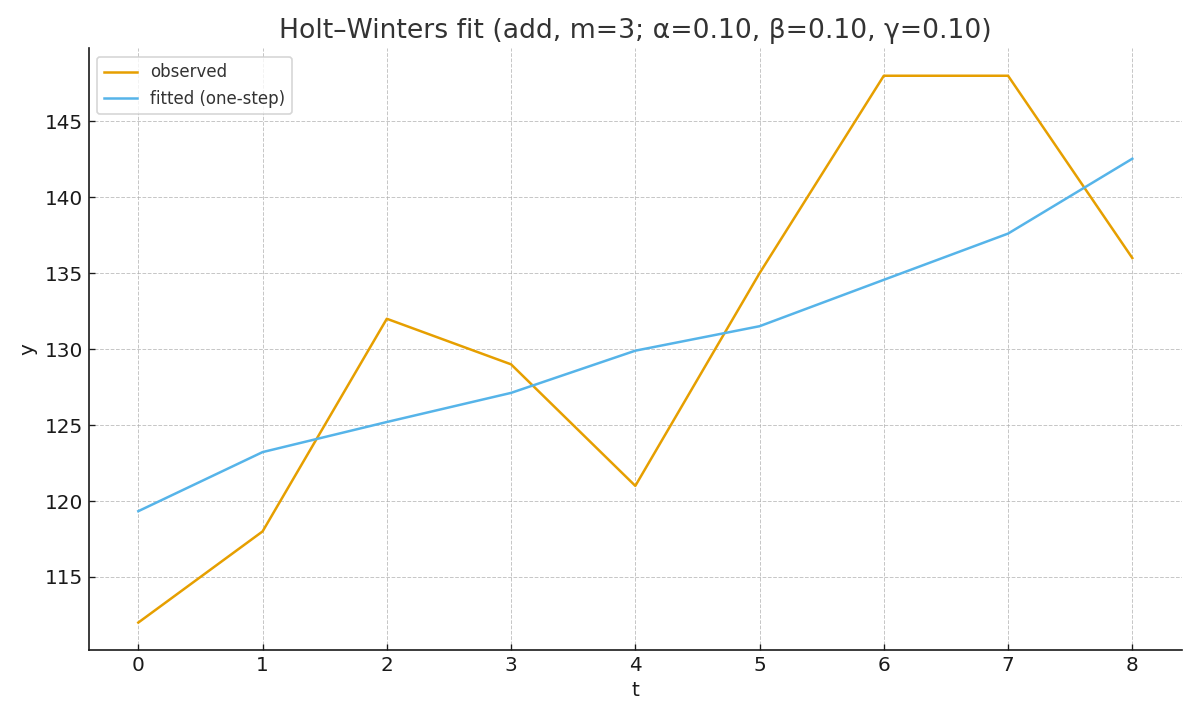

In [1]:
import matplotlib.pyplot as plt, numpy as np
t = np.arange(len(y))
plt.figure(); plt.plot(t,y,label='observed'); plt.plot(t,yhat,label='fitted (one-step)')
plt.xlabel('t'); plt.ylabel('y'); plt.title('Holt–Winters fit'); plt.legend(); plt.tight_layout(); plt.show()

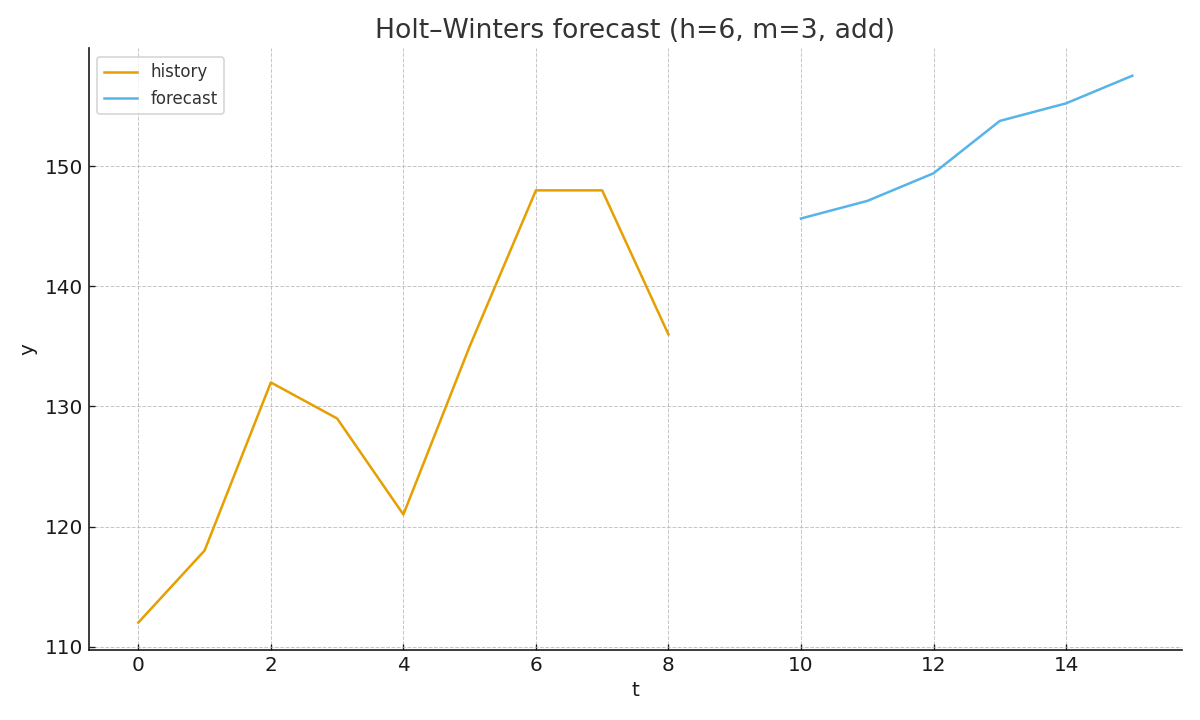

In [2]:
import matplotlib.pyplot as plt, numpy as np
h=6; y_fc=[145.65611163733584, 147.1210487689482, 149.42138847048093, 153.782837287573, 155.24777441918533, 157.54811412071808]
t = np.arange(len(y))
plt.figure(); plt.plot(t,y,label='history'); plt.plot(np.arange(len(y)+1,len(y)+1+h), y_fc, label='forecast')
plt.xlabel('t'); plt.ylabel('y'); plt.title('Holt–Winters forecast'); plt.legend(); plt.tight_layout(); plt.show()

### Notas
- Inicialización por promedios estacionales.
- Evaluación del error desde $t\ge m$.
- Con series positivas y amplitud creciente, el modelo multiplicativo suele ser más adecuado.